# IP Network Traffic Flow
### Introductory Information
A <b>flow</b> consists of all traffic that belongs to the same communication context, basically, <b>IP data packets</b> that belongs to the same connection. While IP is completely packet based and has no nortion of connection, chances are applications that communicate with each other using IP will exchange in general more than one packet when they start communicating.

For example, a file transfer application breaks the file to be transferred into several individual packets. All packets are for the same transfer and need to be delivered over a network and may "flow" over the same router. The same applies for an image that is to be transfered for viewing a web page or a Voice over IP conversation carried out between two users. This way, when a router sees one packet passing over from one point to a certain destination, chances are there may be more coming . A flow ,may as well consist of only a single packet transfer.

<b>Statistical information</b> about IP-based data traffic that "flows" over a <b>router</b> is communicated by <b>Netflow</b>. The statistics are provided on a per-flow basis.

A flow is uniquely identified by the following pieces of information

 - <b>Source Address</b>
 - <b>Source Port</b>
 - <b>Destination Address</b>
 - <b>Destination Port</b>
 - <b>Protocol type</b> (for example whether the packet carries TCP or UDP)
 - <b>Input logic Interface</b> (identified by the same index that is used for the interface in SNMP MIBs; this is needed      because, in addition to the source address and port, in the case of <b>private networks with private IP address         spaces</b>, the    other pieces of information might not be unique to one flow)
 - Knowing how much traffic of what type was sent at what time from where to where allows network managers to account for      detailed network use by individual users. This is important if a network provider wants to charge based on actual          traffic consumption instead of charging simply a flat access fee.
   As traffic flows across multiple routers, the network provider must be sure to avoid double-counting the same traffic on    multiple counters. This can be ensured by correlating flow records that are collected on multiple routers, or by taking    into account only the flow records generated by the access router through which a particular user is known to connect to    the rest of the network
 - It provides a wealth of data for traffic analysis, bottleneck, and network planning.
 - It can provide an invaluable tool to spot and defend against attacks on a network that carry certain characteristics in    terms of the traffic patterns they generate.
 

### Data
The dataset is based on <b>IP Network Flows labelled by 75 apps</b>. It was collected in a network section from Universidad Del Cauca, Popayán, Colombia by performing <b>packet captures</b> at different hours during morning and afternoon for six days. A total of 3577296 instances were collected and stored in a csv file.

#### Content of the Dataset
The dataset contains 87 features. Each instance contains information of an IP flow generated by a network device, i.e., <b>source and destination IP address, ports, interarrival times, layer 7 protocol (application)</b> used on that flow as the class e.t.c.  

From this data, a <b>Machine Learning model</b> aimed at <b>predicting protocol name</b> will be created, trained and evaluated for performance. The dataset will be thoroughly cleaned to ensure high accuracy and great performance of the model on new data.

### Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Show all columns no matter how many
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [3]:
# load dataset
dataset = pd.read_csv("Dataset-Unicauca-Version2-87Atts.csv")

In [4]:
# create dataframe and display top 5 rows of the dataset
df = pd.DataFrame(dataset)
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414.0,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698.0,41178.0,762.555556,1230.348220,5133.0,1.0,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0.0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0.0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0.0,107.0,53.500000,75.660426,107.0,0.0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0.0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [5]:
# The shape of the dataset
df.shape

(3577296, 87)

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [7]:
# Dataset's columns
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [8]:
# Extract the dataset to remian with a subset that has usefull features only
df_subset = df[['Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol','Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets','Flow.Bytes.s',
       'Flow.Packets.s','Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s','FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count',
       'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio',
       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk',
       'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk',
       'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes',
       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label', 'L7Protocol',
       'ProtocolName']]
df_subset.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Flow.Bytes.s,Flow.Packets.s,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,45523,22,55,132,110414.0,2.428355e+06,1.691453e+03,0,0,0,0,440,1100,4.832722e+02,1208.180480,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,1,2,0,12,0.0,1.200000e+07,2.000000e+06,0,0,0,0,40,0,2.000000e+06,0.000000,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,1,3,0,674,0.0,6.740000e+08,3.000000e+06,1,0,0,0,96,0,3.000000e+06,0.000000,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,217,1,3,0,0.0,0.000000e+00,1.843318e+04,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,78068,5,0,1076,0.0,1.378286e+04,6.404673e+01,1,0,0,0,100,0,6.404673e+01,0.000000,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [9]:
df_subset.tail()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Flow.Bytes.s,Flow.Packets.s,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
3577291,98.138.79.73,443,10.200.7.199,42135,6,2290821,5,4,599,2159.0,1.203935e+03,3.928722,1,0,0,0,160,128,2.182624,1.746099,0,1,0,0,1,0,0,0,0,373.000000,119.800000,539.75,0,0,0,0,0,0,5,599,4,2159,126,1002,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,98.138.79.73,443,10.200.7.217,51546,6,24,5,0,1448,0.0,6.033333e+07,208333.333333,0,0,0,0,160,0,208333.333333,0.000000,0,0,0,0,1,0,0,0,0,579.200000,289.600000,0.00,0,0,0,0,0,0,5,1448,0,0,1321,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,98.138.79.73,443,10.200.7.218,44366,6,2591653,6,5,1202,4184.0,2.078210e+03,4.244395,1,0,0,0,192,160,2.315125,1.929271,0,1,0,0,1,0,0,0,0,544.272727,200.333333,836.80,0,0,0,0,0,0,6,1202,5,4184,126,1321,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,98.138.79.73,443,10.200.7.195,52341,6,2622421,4,3,632,2352.0,1.137880e+03,2.669289,1,0,0,0,128,96,1.525308,1.143981,0,1,0,0,1,0,0,0,0,466.285714,158.000000,784.00,0,0,0,0,0,0,4,632,3,2352,127,661,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577295,98.138.79.73,443,10.200.7.196,34188,6,2009138,3,2,597,2076.0,1.330421e+03,2.488629,1,0,0,0,96,64,1.493178,0.995452,0,1,0,0,1,0,0,0,0,654.000000,199.000000,1038.00,0,0,0,0,0,0,3,597,2,2076,127,661,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [10]:
df_subset.shape

(3577296, 57)

In [14]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 57 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Source.IP                    object 
 1   Source.Port                  int64  
 2   Destination.IP               object 
 3   Destination.Port             int64  
 4   Protocol                     int64  
 5   Flow.Duration                int64  
 6   Total.Fwd.Packets            int64  
 7   Total.Backward.Packets       int64  
 8   Total.Length.of.Fwd.Packets  int64  
 9   Total.Length.of.Bwd.Packets  float64
 10  Flow.Bytes.s                 float64
 11  Flow.Packets.s               float64
 12  Fwd.PSH.Flags                int64  
 13  Bwd.PSH.Flags                int64  
 14  Fwd.URG.Flags                int64  
 15  Bwd.URG.Flags                int64  
 16  Fwd.Header.Length            int64  
 17  Bwd.Header.Length            int64  
 18  Fwd.Packets.s                float64
 19  

From the information above, there are four categorical features namely; Source.IP, Destination.IP, Label and ProtocolName.
Some of them are usefull into traning the model so they will have to be converted to numerical values. Incase there are those that are not usefull, they'll be dropped.

In [15]:
df_subset.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Flow.Bytes.s,Flow.Packets.s,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3577296.0,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3577296.0,3577296.0,3577296.0,3577296.0,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,3.799938e+04,1.204246e+04,6.005508e+00,2.544247e+07,6.237799e+01,6.534083e+01,4.683323e+04,8.445742e+04,4.048709e+06,8.896338e+04,1.720414e-01,0.0,0.0,0.0,1.653339e+03,1.743621e+03,7.705816e+04,1.190522e+04,7.037159e-03,1.720414e-01,6.655865e-04,4.058210e-01,5.995705e-01,2.773847e-01,0.0,6.566412e-04,9.085471e-01,2.075630e+02,1.149212e+02,2.547845e+02,0.0,0.0,0.0,0.0,0.0,0.0,6.237799e+01,4.683323e+04,6.534083e+01,8.445742e+04,8.984691e+03,2.123489e+03,4.503535e+01,2.569738e+01,2.981990e+05,1.836406e+05,5.229372e+05,1.676336e+05,8.524211e+06,1.370991e+06,9.743845e+06,7.252097e+06,1.029508e+02
std,2.201713e+04,2.044916e+04,3.274574e-01,4.014430e+07,1.094086e+03,1.108092e+03,1.816196e+06,2.124319e+06,7.551040e+07,4.027620e+05,3.774165e-01,0.0,0.0,0.0,3.008890e+04,3.039190e+04,3.683153e+05,1.080206e+05,8.359210e-02,3.774165e-01,2.579038e-02,4.910503e-01,4.899855e-01,4.477080e-01,0.0,2.561660e-02,1.269945e+00,3.432270e+02,2.464707e+02,5.060731e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.094086e+03,1.816196e+06,1.108092e+03,2.124319e+06,1.410126e+04,7.704789e+03,9.748192e+02,6.025989e+00,2.349390e+06,1.325838e+06,3.266508e+06,2.064219e+06,1.706568e+07,4.814474e+06,1.888557e+07,1.600754e+07,5.129198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666667e-02,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,8.333337e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.697000e+03,4.430000e+02,6.000000e+00,6.280000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,1.882429e+01,1.128096e+00,0.000000e+00,0.0,0.0,0.0,4.000000e+01,3.200000e+01,5.417242e-01,1.009873e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,9.000000e+00,6.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,4.110000e+02,1.800000e+01,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01
50%,4.937700e+04,3.128000e+03,6.000000e+00,5.847295e+05

In [17]:
df_subset.isna().sum()

Source.IP                      0
Source.Port                    0
Destination.IP                 0
Destination.Port               0
Protocol                       0
Flow.Duration                  0
Total.Fwd.Packets              0
Total.Backward.Packets         0
Total.Length.of.Fwd.Packets    0
Total.Length.of.Bwd.Packets    0
Flow.Bytes.s                   0
Flow.Packets.s                 0
Fwd.PSH.Flags                  0
Bwd.PSH.Flags                  0
Fwd.URG.Flags                  0
Bwd.URG.Flags                  0
Fwd.Header.Length              0
Bwd.Header.Length              0
Fwd.Packets.s                  0
Bwd.Packets.s                  0
FIN.Flag.Count                 0
SYN.Flag.Count                 0
RST.Flag.Count                 0
PSH.Flag.Count                 0
ACK.Flag.Count                 0
URG.Flag.Count                 0
CWE.Flag.Count                 0
ECE.Flag.Count                 0
Down.Up.Ratio                  0
Average.Packet.Size            0
Avg.Fwd.Se

The subset does not have any null values.

In [19]:
# Save figures as png files
from pathlib import Path

IMAGES_PATH = Path()/ "images" / "end_to_end_project/"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

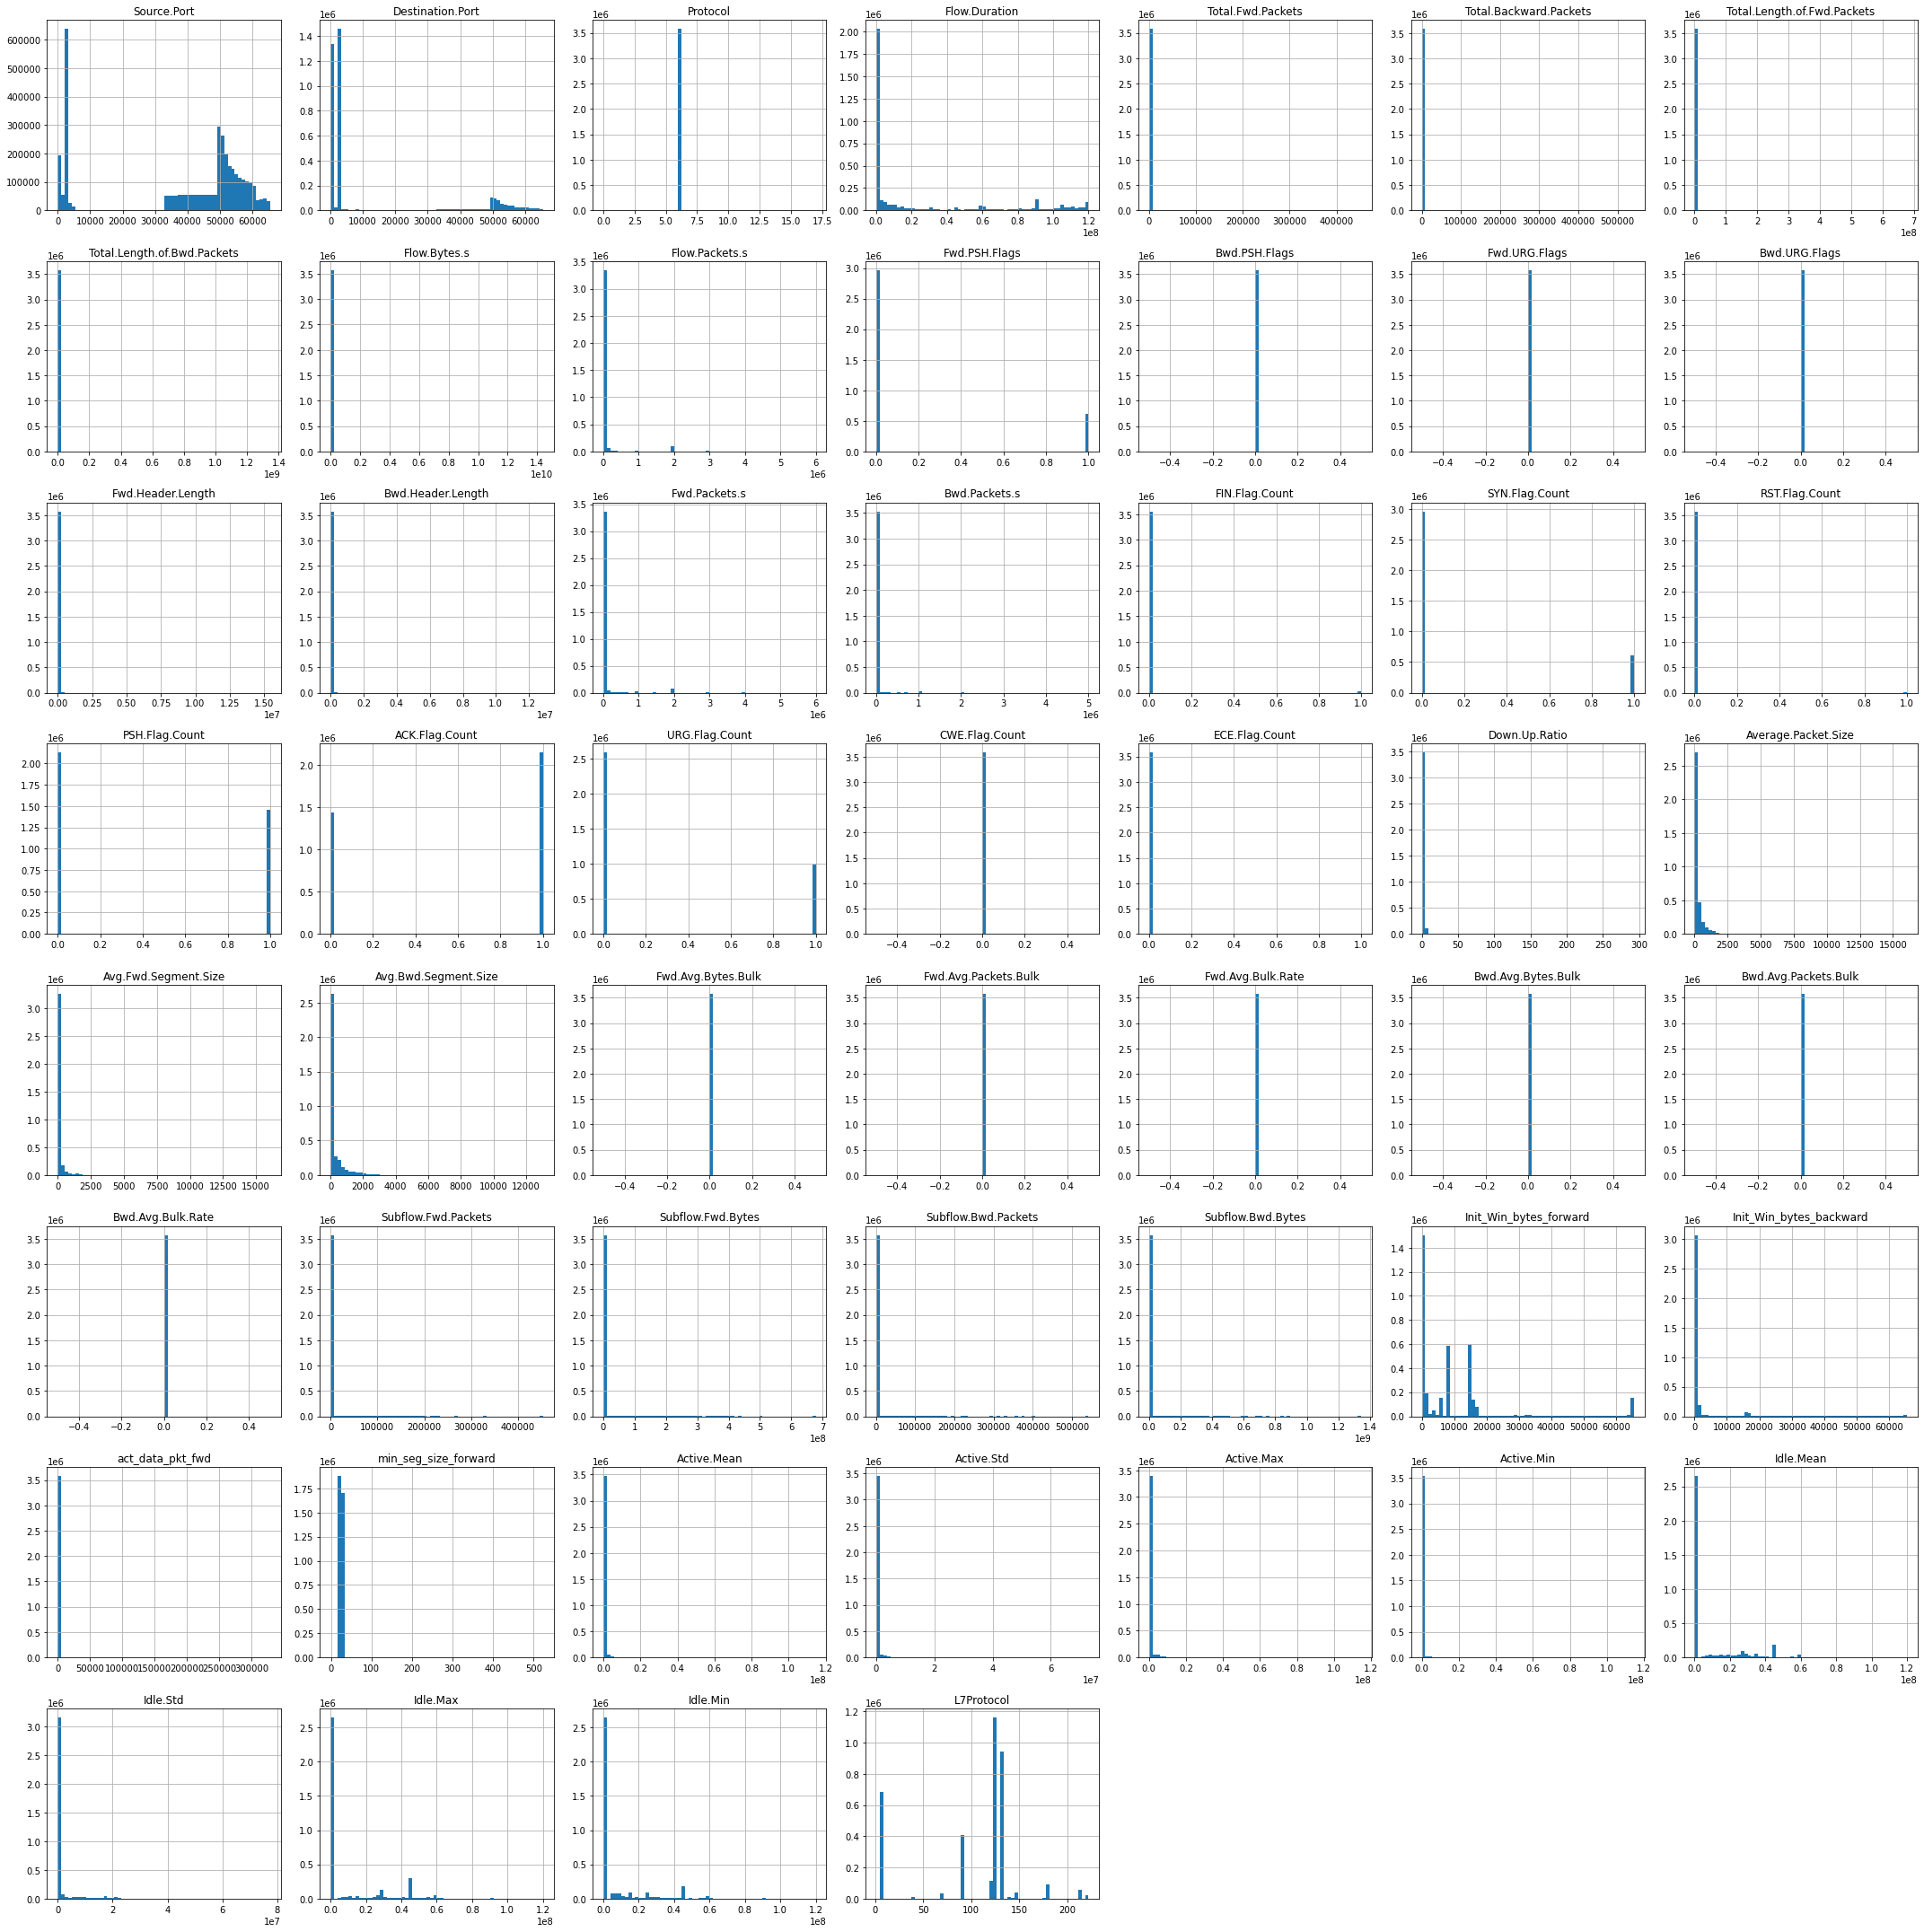

In [29]:
# Dataset distribution using histogram
df_subset.hist(bins=60, figsize=(30,30))
save_fig("dataset_distribution")

From the above distribution, Average.Packet.Size and Avg.Bwd.Segment.Size are Positively skewed. Int_win_bytes_forward is multi modal. Most of other features such as Source.Port, Destination.Port, Flow.Duration, Idle.Max, L7Protocol e.t.c. are randomly distributed. Other features such as Total.Fwd.Packets, Total.Backward.Packets, Flow.Bytes e.t.c. have single mode distributions which can mean that their values fall within the same range and have the same frequency or count, it is however difficult to conclude their distribution based on this kind of visualization, other visualization methods such box and violin plots might give more information about them.